### 1.3 目标检测基础概念

#### 1.3.1 边界框（Bounding Box）

一张图片仅包含一个目标的情况

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# 定义绘制边界框的函数
def draw_bounding_box(ax, bbox, format='xyxy', color='r'):
    """
    在图像上绘制边界框。
    
    :param ax: Matplotlib轴对象
    :param bbox: 边界框坐标 [x_min, y_min, x_max, y_max] 或 [x_center, y_center, width, height]
    :param format: 'xyxy' 表示 [x_min, y_min, x_max, y_max], 'cwh' 表示 [x_center, y_center, width, height]
    :param color: 边界框颜色
    """
    if format == 'xyxy':
        # 提取左上角和右下角坐标
        x_min, y_min, x_max, y_max = bbox
        # 创建矩形补丁
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor=color, facecolor='none')
    elif format == 'cwh':
        # 提取中心点坐标、宽度和高度
        x_center, y_center, width, height = bbox
        # 计算左上角坐标
        rect = patches.Rectangle((x_center - width / 2, y_center - height / 2), width, height, linewidth=2, edgecolor=color, facecolor='none')
    else:
        raise ValueError("Unsupported bounding box format")
    
    # 将矩形补丁添加到轴上
    ax.add_patch(rect)

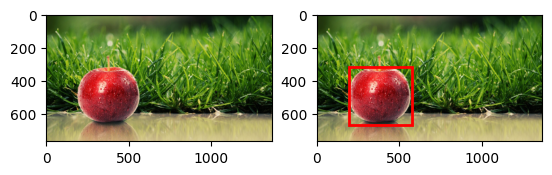

In [2]:
fig, ax = plt.subplots(1,2)
# 导入图片并展示
image = plt.imread('./images/apple_1.jpg')
ax[0].imshow(image)

#在图像中添加边界框
bbox_xyxy = [196, 317, 575, 666]  # 左上角坐标和右下角坐标
ax[1].imshow(image)
# 使用红色绘制 xyxy 格式的边界框
draw_bounding_box(ax[1], bbox_xyxy, format='xyxy', color='red')  

In [4]:
# 定义边界框方式转换的函数
def convert_bbox_format(bbox, source_format='xyxy', target_format='cwh'):
    """
    将边界框从一种格式转换为另一种格式。
    
    :param bbox: 原始边界框坐标
    :param source_format: 原始边界框格式 ('xyxy' 或 'cwh')
    :param target_format: 目标边界框格式 ('xyxy' 或 'cwh')
    :return: 转换后的边界框坐标
    """
    if source_format == 'xyxy' and target_format == 'cwh':
        # 提取左上角和右下角坐标
        x_min, y_min, x_max, y_max = bbox
        # 计算中心点坐标、宽度和高度
        return [(x_min + x_max) / 2, (y_min + y_max) / 2, x_max - x_min, y_max - y_min]
    elif source_format == 'cwh' and target_format == 'xyxy':
        # 提取中心点坐标、宽度和高度
        x_center, y_center, width, height = bbox
        # 计算左上角和右下角坐标
        return [x_center - width / 2, y_center - height / 2, x_center + width / 2, y_center + height / 2]
    elif source_format == target_format:
        # 如果源格式和目标格式相同，直接返回原始边界框
        return bbox
    else:
        raise ValueError("Unsupported conversion between formats")

In [5]:
# 将xyxy转换为xywh
converted_bbox_xyxy_to_cwh = convert_bbox_format(bbox_xyxy, 'xyxy', 'cwh')
print(f"Converted to cwh: {converted_bbox_xyxy_to_cwh}")

Converted to cwh: [385.5, 491.5, 379, 349]


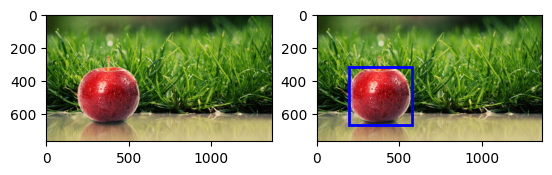

In [6]:
fig, ax = plt.subplots(1,2)
# 绘制原始图像
ax[0].imshow(image)
# 以xywh方式在图像中添加蓝色的边界框
ax[1].imshow(image)
draw_bounding_box(ax[1], converted_bbox_xyxy_to_cwh, format='cwh', color='blue')   
plt.show()

**一张图片包含多个目标的情况**

在图像上绘制多个边界框函数

In [7]:
def draw_bounding_boxes(ax, bboxes, formats=None, colors=None):
    """
    在图像上绘制多个边界框。
    
    :param ax: Matplotlib轴对象
    :param bboxes: 边界框坐标列表，每个元素为 [x_min, y_min, x_max, y_max] 或 [x_center, y_center, width, height]
    :param formats: 边界框格式列表，默认为 ['xyxy'] * len(bboxes)
    :param colors: 边界框颜色列表，默认为 ['r'] * len(bboxes)
    """
    if formats is None:
        formats = ['xyxy'] * len(bboxes)
    if colors is None:
        colors = ['r'] * len(bboxes)
    
    for bbox, fmt, col in zip(bboxes, formats, colors):
        draw_bounding_box(ax, bbox, format=fmt, color=col)

导入图片并绘制多个边界框

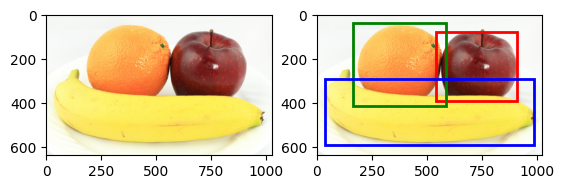

In [15]:
_ , ax = plt.subplots(1,2)

# 导入并绘制图像
image = plt.imread('./images/mixed_1.jpg')
ax[0].imshow(image)

# 定义多个边界框及其格式和颜色
bboxes = [
    [542, 77, 911, 389],  # 左上角坐标和右下角坐标
    [166,36,586,412],  # 左上角坐标和右下角坐标
    [39,289,986,591]   # 左上角坐标和右下角坐标
]
formats = ['xyxy', 'xyxy', 'xyxy']
colors = ['red', 'green', 'blue']

# 绘制带多个边界框的图像
ax[1].imshow(image)
draw_bounding_boxes(ax[1], bboxes, formats=formats, colors=colors)

# 显示图像
plt.show()

批量将xyxy转换为xywh

In [17]:
def convert_bboxes_format(bboxes, source_format='xyxy', target_format='cwh'):
    """
    将多个边界框从一种格式转换为另一种格式。
    
    :param bboxes: 原始边界框坐标列表
    :param source_format: 原始边界框格式 ('xyxy' 或 'cwh')
    :param target_format: 目标边界框格式 ('xyxy' 或 'cwh')
    :return: 转换后的边界框坐标列表
    """
    return [convert_bbox_format(bbox, source_format, target_format) for bbox in bboxes]

In [18]:
converted_bboxes_xyxy_to_cwh = convert_bboxes_format(bboxes, 'xyxy', 'cwh')
print(f"Converted to cwh: {converted_bboxes_xyxy_to_cwh}")

Converted to cwh: [[726.5, 233.0, 369, 312], [376.0, 224.0, 420, 376], [512.5, 440.0, 947, 302]]


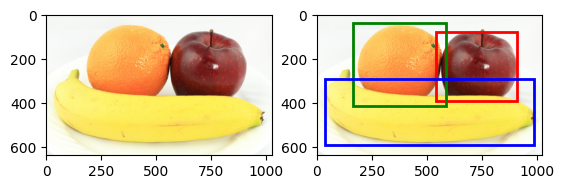

In [19]:
_ , ax = plt.subplots(1,2)

# 绘制原图像
ax[0].imshow(image)

formats = ['cwh', 'cwh', 'cwh']
colors = ['red', 'green', 'blue']

# 绘制带多个边界框的图像
ax[1].imshow(image)
draw_bounding_boxes(ax[1], converted_bboxes_xyxy_to_cwh, formats=formats, colors=colors)

# 显示图像
plt.show()

### 1.3.2 锚框（Anchor box）

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def generate_anchors(center_x,center_y,img_height, img_width,scales, ratios):
    """
    生成一系列锚框。

    参数:
    - center_x: 锚框中心点的x坐标。
    - center_y: 锚框中心点的y坐标。
    - img_height: 图片的高度。
    - img_width: 图片的宽度。
    - scales: 包含不同尺度的列表。
    - ratios: 包含不同宽高比的列表。

    返回:
    - anchors: 包含所有生成锚框坐标的列表。
    """
    anchors = []
    for scale in scales:
        for ratio in ratios:
            # 计算宽度和高度
            w = scale * img_width * np.sqrt(ratio)
            h = scale * img_height / np.sqrt(ratio)
            # 计算锚框的左上角和右下角坐标，生成的锚框范围不能超出图片尺寸之外
            x_min = max(int(center_x - w / 2),0)
            y_min = max(int(center_y - h / 2),0)
            x_max = min(int(center_x + w / 2),img_width -1)
            y_max = min(int(center_y + h / 2),img_height -1)
            # 将锚框坐标添加到列表中
            anchors.append((x_min, y_min, x_max, y_max))
    return anchors

In [85]:
# 读取图片
image = plt.imread('./images/apple_1.jpg')

# 中心点
center_x, center_y = 385.5, 491.5

# 图片高和宽
img_height, img_width = image.shape[0],image.shape[1]
    
# 定义尺度和宽高比
scales = [0.3,0.5]
ratios = [0.5,1]

# 生成锚框
anchors = generate_anchors(center_x, center_y,img_height, img_width, scales, ratios)

In [87]:
# 查看生成的锚框
anchors

[(240, 328, 530, 654),
 (180, 376, 590, 606),
 (144, 219, 626, 763),
 (44, 299, 727, 683)]

In [93]:
def draw_anchors(image, anchors):
    """
    在图像上绘制一系列锚框。

    参数:
    - image: 输入图像。
    - anchors: 包含锚框坐标的列表。
    """
    fig, ax = plt.subplots()
    ax.imshow(image)  # 将BGR格式转换为RGB格式

    for anchor in anchors:
        x_min, y_min, x_max, y_max = anchor
        width = x_max - x_min
        height = y_max - y_min
        # 创建矩形补丁
        rect = Rectangle((x_min, y_min), width, height, linewidth=2, 
                         edgecolor='r', facecolor='none')
        # 添加矩形补丁到轴上
        ax.add_patch(rect)

    plt.axis('off')  # 关闭坐标轴
    plt.show()

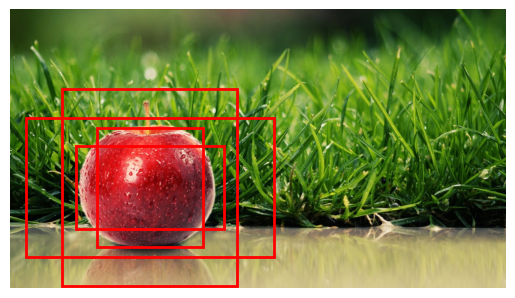

In [94]:
 # 绘制锚框
draw_anchors(image, anchors)

### 1.3.3 交并比(IoU)

自定义交并比函数

In [3]:
# 计算IoU，矩形框的坐标形式为xyxy，这个函数会被保存在box_utils.py文件中
def box_iou_xyxy(box1, box2):
    # 获取box1左上角和右下角的坐标
    x1min, y1min, x1max, y1max = box1[0], box1[1], box1[2], box1[3]
    # 计算box1的面积
    s1 = (y1max - y1min + 1.) * (x1max - x1min + 1.)
    # 获取box2左上角和右下角的坐标
    x2min, y2min, x2max, y2max = box2[0], box2[1], box2[2], box2[3]
    # 计算box2的面积
    s2 = (y2max - y2min + 1.) * (x2max - x2min + 1.)
    
    # 计算相交矩形框的坐标
    xmin = np.maximum(x1min, x2min)
    ymin = np.maximum(y1min, y2min)
    xmax = np.minimum(x1max, x2max)
    ymax = np.minimum(y1max, y2max)
    # 计算相交矩形行的高度、宽度、面积
    inter_h = np.maximum(ymax - ymin + 1., 0.)
    inter_w = np.maximum(xmax - xmin + 1., 0.)
    intersection = inter_h * inter_w
    # 计算相并面积
    union = s1 + s2 - intersection
    # 计算交并比
    iou = intersection / union
    return iou

In [102]:
# 计算真实框bbox_xyxy与四个锚框anchors的IoU值
for anchor in anchors:
    print(np.round(box_iou_xyxy(bbox_xyxy,anchor),2))

0.72
0.63
0.51
0.51


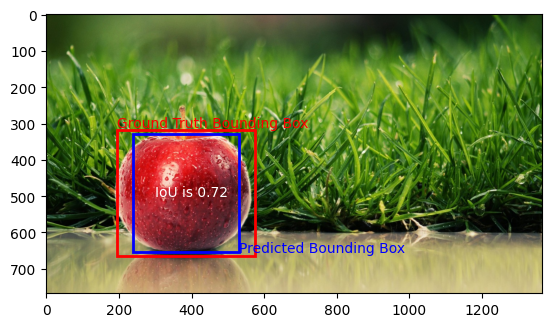

In [130]:
# 添加IoU值
_ , ax = plt.subplots()
ax.imshow(image)
draw_bounding_box(ax, bbox_xyxy, format='xyxy', color='red')
plt.text(196, 317, 'Ground Truth Bounding Box', va = 'bottom', color='red')
draw_bounding_box(ax, anchors[0], format='xyxy', color='blue') 
plt.text(530, 654, 'Predicted Bounding Box', va = 'baseline', color='blue')
plt.text(300,500,
         'IoU is {}'.format(np.round(box_iou_xyxy(bbox_xyxy,anchors[0]),2)),color='white')
plt.show()

### 1.3.4 非极大值阈值（NMS）

假设我们有一个目标检测模型，它在一张图片上预测出了以下几个边界框（Bounding Boxes）及其对应的置信度分数：

| 边界框 | 置信度分数 |
| ------ | ---------- |
| B1     | 0.9        |
| B2     | 0.7        |
| B3     | 0.8        |
| B4     | 0.6        |

假设这些边界框的坐标分别为：

- B1: (x1, y1, x2, y2) = (10, 10, 50, 50)
- B2: (x1, y1, x2, y2) = (15, 15, 55, 55)
- B3: (x1, y1, x2, y2) = (12, 12, 48, 48)
- B4: (x1, y1, x2, y2) = (60, 60, 100, 100)

In [24]:
(48-12)*(48-12)

1296

In [36]:
import torch
from torchvision.ops import nms

# 形状为 (N, 4) 的张量，其中 N 是候选框的数量，
# 每个候选框由四个坐标 [x_min, y_min, x_max, y_max] 表示
bboxes = torch.tensor([[10, 10, 50, 50],
                       [15, 15, 55, 55],
                       [12, 12, 48, 48],
                       [60,60,100,100]], dtype=torch.float32)
# 形状为 (N,) 的张量，包含每个候选框的置信度分数。
scores = torch.tensor([0.9, 0.7, 0.8,0.6], dtype=torch.float32)
# IoU 阈值为0.5，用于决定是否保留重叠的候选框
keep_bboxes = nms(bboxes, scores, 0.5)
print("保持的边界框索引:", keep_bboxes.numpy())

保持的边界框索引: [0 3]


In [25]:
box_iou_xyxy([10,10,50,50],[12,12,48,48])

0.8143961927424153

In [26]:
box_iou_xyxy([10,10,50,50],[15,15,55,55])

0.6272991287512101

In [27]:
box_iou_xyxy([10,10,50,50],[60,60,100,100])

0.0

### 1.4 两阶段的目标检测算法
#### 1.4.3 Faster R-CNN算法
**示例：**基于PyTorch的Faster R-CNN目标检测实现

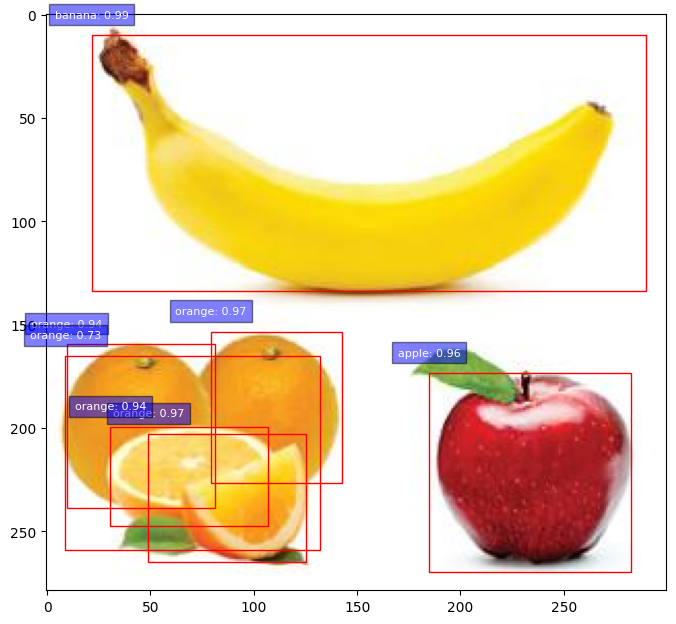

In [5]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

# 获取COCO数据集的类别名称列表
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def get_prediction(img_path, threshold):
    # 打开图像文件
    img = Image.open(img_path)
    
    # 定义图像转换操作：将PIL图像转换为Tensor
    transform = T.Compose([T.ToTensor()])
    img = transform(img)

    # 加载预训练的Faster R-CNN模型
    model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
    # 将模型设置为评估模式
    model.eval()

    # 对图像进行预测
    pred = model([img])
    
    # 提取边界框、得分和标签信息
    boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    scores = list(pred[0]['scores'].detach().numpy())
    labels = [pred[0]['labels'][i].item() for i in range(len(scores))]

    return boxes, scores, labels

def plot_image(img_path, boxes, scores, labels, threshold):
    # 打开图像文件
    img = Image.open(img_path)
    # 创建一个绘图窗口
    fig, ax = plt.subplots(figsize=(8, 8))
    # 显示图像
    ax.imshow(img)

    # 遍历所有预测结果
    for box, score, label in zip(boxes, scores, labels):
        # 如果得分高于设定的阈值，则绘制边界框和标签
        if score > threshold:
            # 将类别ID转换为物品名称
            object_name = COCO_INSTANCE_CATEGORY_NAMES[label]
            # 格式化文本内容
            text = f'{object_name}: {score:.2f}'
            # 在图像上标注文本
            ax.annotate(text, (box[0][0], box[0][1]-10), color='white', fontsize=8,
                        ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))
            # 创建矩形框
            rect = plt.Rectangle((box[0][0], box[0][1]), box[1][0] - box[0][0], box[1][1] - box[0][1],
                                 fill=False, color='red')
            # 添加矩形框到绘图中
            ax.add_patch(rect)

    # 显示最终的图像
    plt.show()

if __name__ == "__main__":
    # 替换为你的图片路径
    img_path = './images/mixed_19.jpg'  
    # 获取预测结果
    boxes, scores, labels = get_prediction(img_path, 0.7)
    # 绘制图像并显示预测结果
    plot_image(img_path, boxes, scores, labels, 0.7)